# Compare NameTag model to BiLSTM model
We will compare BiLSTM model we trained for NER mainly of Czech poetry to a NameTag 2.0 model made by ÚFAL

The models will be compared on a dataset for which we have correct labels

The dataset is Czech Named Entity Corpus also created by ÚFAL

This dataset was used to train Nametag 2.0 so we will compare our models on the etest part fo dataset (testing dataset that was supposedly hidden during training of Nametag 2.0)

Since the number of categories NameTag recognizes are many we decided to focus only on those both of these models can recognize and those are entities of a Person and of a Place

We had to do a bit of formatting of the output of these models so we can compare them well



### Compare accuracy

In [1]:
from calculate_accuracy import calculate_accuracy, calculate_accuracy_only_B_entities, calculate_accuracy_only_true_entities, calculate_accuracy_no_category
true_output_file = "files_to_compare/named_ent_etest_BIO_correct.txt"
BiLSTM_output_file = "BiLSTM_results/clean_BIO_output_named_ent_etest.txt"
NameTag_output_file = "NameTag_results/output_named_ent_etest_BIO.txt"


In [2]:
def print_accuracies(true_file: str, BiLSTM_file: str, NameTag_file: str, calculate_mystic = False):   
    print("Accuracies do consider Mystic Person as separate entity from Person: ", calculate_mystic)
    print() 
    print("Accuracy with BiLSTM: ", calculate_accuracy(true_file, BiLSTM_file, calculate_mystic))
    print("Accuracy with NameTag: ", calculate_accuracy(true_file, NameTag_file, calculate_mystic))
    print()
    print("Accuracy with B-entities only BiLSTM: ", calculate_accuracy_only_B_entities(true_file, BiLSTM_file, calculate_mystic))
    print("Accuracy with B-entities only NameTag: ", calculate_accuracy_only_B_entities(true_file, NameTag_file, calculate_mystic))
    print()
    print("Accuracy on predicting correct entity category BiLSTM (only words that are entities in both files)", calculate_accuracy_only_true_entities(true_file, BiLSTM_file, calculate_mystic))
    print("Accuracy on predicting correct entity category NameTag (only words that are entities in in both files)", calculate_accuracy_only_true_entities(true_file, NameTag_file, calculate_mystic))
    print()
    print("Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) BiLSTM", calculate_accuracy_no_category(true_file, BiLSTM_file, calculate_mystic))
    print("Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) NameTag", calculate_accuracy_no_category(true_file, NameTag_file, calculate_mystic))

In [3]:
print_accuracies(true_output_file, BiLSTM_output_file, NameTag_output_file)

Accuracies do consider Mystic Person as separate entity from Person:  False

Accuracy with BiLSTM:  0.8951400526693799
Accuracy with NameTag:  0.9839118984917404

Accuracy with B-entities only BiLSTM:  0.8951350316031411
Accuracy with B-entities only NameTag:  0.9837103184338354

Accuracy on predicting correct entity category BiLSTM (only words that are entities in both files) 0.5466666666666666
Accuracy on predicting correct entity category NameTag (only words that are entities in in both files) 0.987434554973822

Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) BiLSTM 0.6810712111990261
Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) NameTag 0.9153986609860012


**Accuracy result**

From the accuracy we can clearly see that the NameTag model seem to perform much better (by ~9% points)

### Distribution of entities for both models
How many of each entity do we have in the model

In [4]:
def count_categories(file_path: str) -> tuple:
    '''
    Counts number of words, total number of entities and number of entities of each type
    @return: words_num, total_entities, place_entities, person_entities
    '''
    words_num = 0
    place = 0
    person = 0
    non = 0
    
    with open (file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            words_num += 1

            category = line.strip().split('\t')[-1]
            category = category.strip()

            match category:
                case 'B-PLACE':
                    place += 1
                case 'B-PERSON':
                    person += 1
                case 'I-PLACE':
                    place += 1
                case 'I-PERSON':
                    person += 1
                case 'O':
                    non += 1

    return words_num, place + person, person, place, non

**Function to plot a pie chart of entity distribution**

In [5]:
import matplotlib.pyplot as plt

def plot_categories(true_file: str, BiLSTM_file: str, NameTag_file: str):
     categories_true = count_categories(true_file)
     categories_BiLSTM = count_categories(BiLSTM_file)
     categories_NameTag = count_categories(NameTag_file)  
        
     total_word_count= categories_true[0]
     entity_count_true = categories_true[1]
     person_count_true = categories_true[2]
     place_count_true = categories_true[3]
     non_count_true = categories_true[4] 
         
     entity_count_BiLSTM = categories_BiLSTM[1]
     person_count_BiLSTM = categories_BiLSTM[2]
     place_count_BiLSTM = categories_BiLSTM[3]
     non_count_BiLSTM = categories_BiLSTM[4]   
       
     entity_count_NameTag = categories_NameTag[1]
     person_count_NameTag = categories_NameTag[2]
     place_count_NameTag = categories_NameTag[3]
     non_count_NameTag = categories_NameTag[4]  
       
     print("Total word count: ", total_word_count)
     print()
     print("True total number of all entities: ", entity_count_true)
     print("Number of Person entities in true file: ", person_count_true)
     print("Number of Place entities in true file: ", place_count_true)
     print()
     print("Total number of all entities using BiLSTM: ", entity_count_BiLSTM)
     print("Number of Person entities for BiLSTM: ", person_count_BiLSTM)
     print("Number of Place entities for BiLSTM: ", place_count_BiLSTM)
     print()
     print("Total number of all entities using NameTag: ", entity_count_NameTag)
     print("Number of Person entities for NameTag: ", person_count_NameTag)
     print("Number of Place entities for NameTag: ", place_count_NameTag)    
      
     def my_autopct(pct):
             return ('%.2f%%' % pct) if pct > 5 else ''     
     # Pie chart
     
     labels = 'Place', 'Person'
     sizes_BiLSTM = [place_count_BiLSTM, person_count_BiLSTM]
     sizes_BiLSTM_with_O = [place_count_true, person_count_true, non_count_BiLSTM]
     sizes_NameTag = [place_count_NameTag, person_count_NameTag]
     sizes_NameTag_with_O = [place_count_true, person_count_true, non_count_NameTag]
     sizes_true = [place_count_true, person_count_true]
     sizes_true_with_O = [place_count_true, person_count_true, non_count_true]    
      
     fig1, axarr = plt.subplots(3, 2, figsize=(10, 10))     
     
     axarr[0, 0].pie(sizes_true, autopct=my_autopct, shadow=False, startangle=90)
     axarr[0, 0].legend(labels, loc="lower right")
     axarr[0, 0].set_title("True entity categories (categories only)")
     axarr[0, 0].axis('equal')  
        
     axarr[0, 1].pie(sizes_true_with_O, autopct=my_autopct, shadow=False, startangle=90)
     axarr[0, 1].legend(labels, loc="lower right")
     axarr[0, 1].set_title("True entity categories (all words)")
     axarr[0, 1].axis('equal')     
     
     axarr[1, 0].pie(sizes_BiLSTM, autopct=my_autopct, shadow=False, startangle=90)
     axarr[1, 0].legend(labels, loc="lower right")
     axarr[1, 0].set_title("Entity categories using BiLSTM (categories only)")
     axarr[1, 0].axis('equal')     
     
     axarr[1, 1].pie(sizes_BiLSTM_with_O, autopct=my_autopct, shadow=False, startangle=90)
     axarr[1, 1].legend(labels, loc="lower right")
     axarr[1, 1].set_title("Entity categories using BiLSTM (all words)")
     axarr[1, 1].axis('equal')   
       
     axarr[2, 0].pie(sizes_NameTag, autopct=my_autopct, shadow=False, startangle=90)
     axarr[2, 0].legend(labels, loc="lower right")
     axarr[2, 0].set_title("Entity categories using NameTag (categories only)")
     axarr[2, 0].axis('equal')   
       
     axarr[2, 1].pie(sizes_NameTag_with_O, autopct=my_autopct, shadow=False, startangle=90)
     axarr[2, 1].legend(labels, loc="lower right")
     axarr[2, 1].set_title("Entity categories using NameTag (all words)")
     axarr[2, 1].axis('equal')   
     
     plt.tight_layout()  
     plt.show()     

Total word count:  20885

True total number of all entities:  1643
Number of Person entities in true file:  990
Number of Place entities in true file:  653

Total number of all entities using BiLSTM:  2077
Number of Person entities for BiLSTM:  897
Number of Place entities for BiLSTM:  1180

Total number of all entities using NameTag:  1640
Number of Person entities for NameTag:  984
Number of Place entities for NameTag:  656


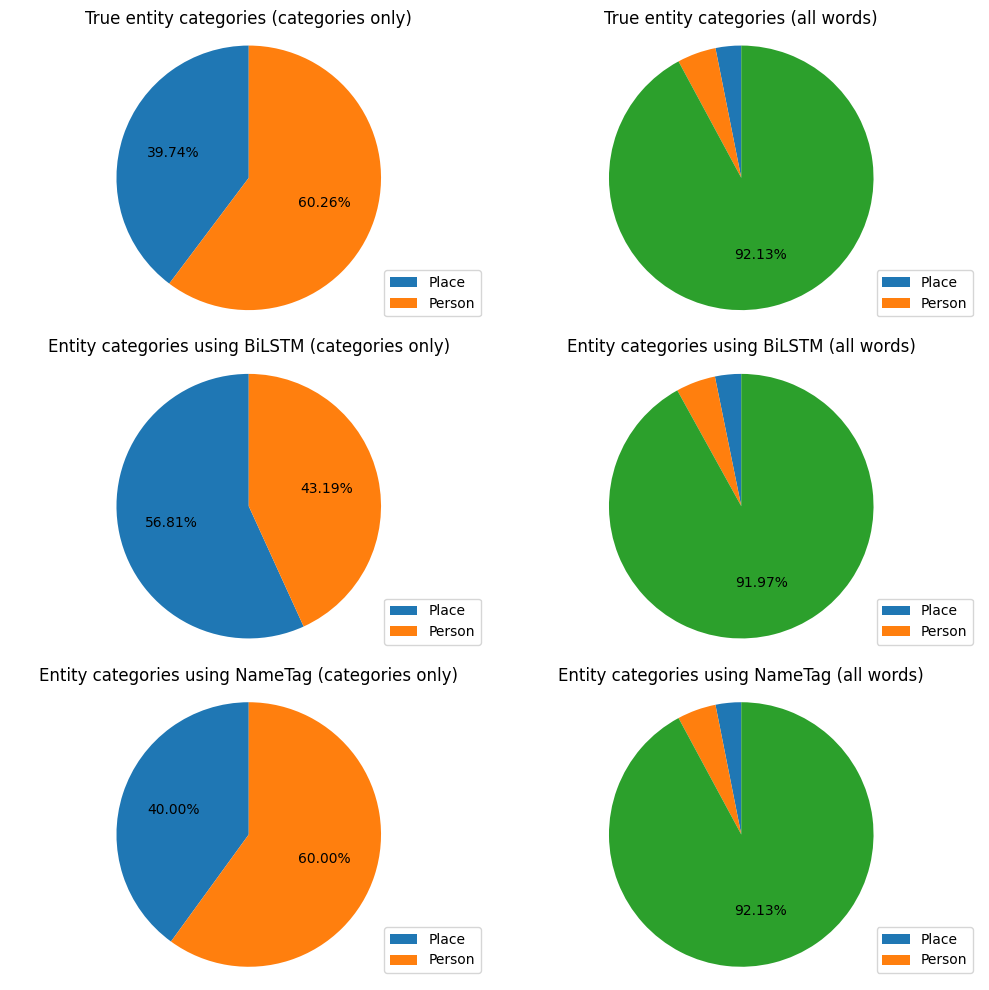

In [6]:
plot_categories(true_output_file, BiLSTM_output_file, NameTag_output_file)

**Entity types distribution**

As we can see from the graph and also from the number of entities NameTag model again seem to be superior.<br>
Not only is the ratio of Person entities to Place entities more similar to the true ratio, but also the number of entities seems to be closer (especially the number of Person entities).<br>
On the other hand BiLSTM model seems to overestimate the number of entities in both categories.

### Compare models on Confusion matrix
True values will be in rows, predicted in columns

In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def labels_to_array(file_path: str) -> list:
    '''
    Read the file and extract values (BIO labels) from the second column
    '''
    bio_labels = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            columns = line.strip().split('\t')
            bio_labels.append(columns[-1])

    return bio_labels

def transform_to_df(confusion_matrix, labels):
    df = pd.DataFrame(confusion_matrix, index=labels, columns=labels)
    return df

def get_conf_matrix(true_file: str, pred_file: str, labels: list) -> pd.DataFrame:
    '''
    Calculate confusion matrix from true labels and predicted labels
    '''
    true_labels = labels_to_array(true_file)
    pred_labels = labels_to_array(pred_file)
    
    conf_matrix = confusion_matrix(true_labels, pred_labels, labels=labels)
    conf_matrix = transform_to_df(conf_matrix, labels)
    
    return conf_matrix

**Confusion matrix BiLSTM model**

In [8]:
get_conf_matrix(true_output_file, BiLSTM_output_file, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "O"])
#True values in rows, predicted in columns

B-PERSON  I-PERSON  B-PLACE  I-PLACE      O
B-PERSON       173         0      239        0    142
I-PERSON       158         1      159        0    118
B-PLACE        101         0      237        0    147
I-PLACE         16         0       35        0    117
O              448         0      506        4  18284

In [9]:
get_conf_matrix(true_output_file, BiLSTM_output_file, labels=["B-PERSON", "B-PLACE", "O"])

B-PERSON  B-PLACE      O
B-PERSON       173      239    142
B-PLACE        101      237    147
O              448      506  18284

**Confusion matrix NameTag 2.0 model**

In [10]:
get_conf_matrix(true_output_file, NameTag_output_file, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "O"])
#True values in rows, predicted in columns

B-PERSON  I-PERSON  B-PLACE  I-PLACE      O
B-PERSON       510         4        3        1     36
I-PERSON        19       387        2        4     24
B-PLACE          9         2      433        5     36
I-PLACE          2         0       10      113     43
O               26        25       47       38  19106

**Confusion matrix result**

Confusion matrix only again consolidates that the NameTag model did a better job at predicting named entities.<br>
We can also see that BiLSTM model had not only problem with false positives (since it predicted more entities then the true number of them) but also with false negatives (we can see that over 100 entities of Person were predicted as not being and entity and also over 100 entities of Place were predicted as not being an entity)<br>
And also last big issue we can see is that BiLSTM model fails to recognize multi-word entities almost completely (truth be said there were not many in its training data)

## Overall result
Overall we can see that NameTag 2.0 by Morphodita outperforms our BiLSTM model significantly.
BiLSTM models lacks especially when it comes to recognizing multi-word entities but also overestimates the number of entities a lot

## Incorrect entities BiLSTM
Lets see which entities BiLSTM misslabeled

In [11]:
def false_positives(true_file_path, pred_file_path, ccv_file = False):
    true_lines = open(true_file_path, 'r', encoding='utf-8').readlines()
    predicted_lines = open(pred_file_path, 'r', encoding='utf-8').readlines()
    
    if len(true_lines) != len(predicted_lines):
        raise ValueError("Files have different lengths")
    
    false_positives = []
    
    for true_line, predicted_line in zip(true_lines, predicted_lines):
        # skip lines with empty space only (these lines just separate stanzas)
        if not true_line.strip() and not predicted_line.strip():
            continue
        
        true_label = true_line.strip().split()[-1]
        predicted_label = predicted_line.strip().split()[-1]
        
        if ccv_file:
            word = true_line.strip().split()[1]
        else:
            word = true_line.strip().split()[0]
        
        if true_label == "O" and predicted_label != "O":
            false_positives.append({"word": word, "true_label": true_label, "predicted_label": predicted_label})
    
    return false_positives

In [12]:
def false_negatives(true_file_path, pred_file_path, ccv_file = False, calculate_mystic = False):
    true_lines = open(true_file_path, 'r', encoding='utf-8').readlines()
    predicted_lines = open(pred_file_path, 'r', encoding='utf-8').readlines()
    
    if len(true_lines) != len(predicted_lines):
        raise ValueError("Files have different lengths")
    
    false_negatives = []
    
    for true_line, predicted_line in zip(true_lines, predicted_lines):
        # skip lines with empty space only (these lines just separate stanzas)
        if not true_line.strip() and not predicted_line.strip():
            continue
        
        true_label = true_line.strip().split()[-1]
        predicted_label = predicted_line.strip().split()[-1]
        
        if ccv_file:
            word = true_line.strip().split()[1]
        else:
            word = true_line.strip().split()[0]
        
        if true_label != "O" and predicted_label == "O":
            
            if true_label[2:] == "MYSTIC" and not calculate_mystic:
                continue
            
            false_negatives.append({"word": word, "true_label": true_label, "predicted_label": predicted_label})
    
    return false_negatives

In [13]:
fp = false_positives(true_output_file, BiLSTM_output_file)

for line in fp:
    print(f'{line["word"]}\t{line["predicted_label"]}')

okýnka	B-PERSON
Publications	B-PLACE
Gallimard	B-PLACE
Larousse	B-PLACE
1993	B-PLACE
taoismus	B-PLACE
deset	B-PLACE
Supraphon	B-PLACE
Poly	B-PLACE
Gramem	B-PLACE
Grammophon	B-PLACE
Decca	B-PLACE
Philips	B-PERSON
Thumbelina	B-PLACE
FP	B-PLACE
FP	B-PERSON
FP	B-PLACE
FP	B-PERSON
FP	B-PERSON
FP	B-PERSON
FP	B-PERSON
miliónů	B-PLACE
ODS	B-PLACE
EGAP	B-PERSON
ČTK	B-PLACE
ČTA	B-PERSON
HDP	B-PLACE
1996	B-PLACE
FF	B-PLACE
UK	B-PLACE
Carusošou	B-PLACE
Milagros	B-PERSON
13	B-PERSON
.	B-PERSON
15	B-PERSON
13	B-PLACE
.	B-PLACE
40	B-PLACE
SOS	B-PERSON
16	B-PLACE
.	B-PLACE
55	B-PLACE
17	B-PLACE
.	B-PLACE
05	B-PLACE
19	B-PLACE
.	B-PLACE
00	B-PLACE
19	B-PERSON
.	B-PERSON
15	B-PERSON
Top	B-PERSON
Club	B-PERSON
11	B-PERSON
.	B-PERSON
45	B-PERSON
12	B-PERSON
.	B-PERSON
05	B-PERSON
15	B-PERSON
.	B-PERSON
35	B-PERSON
17	B-PLACE
.	B-PLACE
00	B-PLACE
1980	B-PERSON
mld	B-PLACE
Havlova	B-PERSON
ztrávil	B-PLACE
intenzivní	B-PLACE
vejplatu	B-PLACE
607492150	B-PLACE
IČ	B-PLACE
73995711	B-PLACE
Globtrotero	B-PLACE
1

### Remove some entities from pred files

We can see that there are a lot of numbers or abbreviations which our model cannot predict correctly (also it predicts marks like "," as entities for some reason). To be fair our BiLSTM model was not trained on words like these.

Therefore I decided to remove these words from the predicted files for both models and measure accuracy again.

In [14]:
def remove_abbreviations_and_numbers(infile_path: str, outfile_path: str):
    '''
    Remove abbreviations and numbers from infile_path and write result to outfile_path
    '''
    with open(infile_path, 'r', encoding='utf-8') as infile, open(outfile_path, 'w', encoding='utf-8') as outfile:
        for line in infile:
            word = line.strip().split()[0]
            
            if word.isdigit():
                continue
            if word.isupper():
                continue
            if len(word) < 3:
                continue
            
            outfile.write(line)

In [15]:
true_output_file_cleaned = "files_to_compare/named_ent_etest_BIO_correct_cleaned.txt"
BiLSTM_output_file_cleaned = "BiLSTM_results/clean_BIO_output_named_ent_etest_cleaned.txt"
NameTag_output_file_cleaned = "NameTag_results/output_named_ent_etest_BIO_cleaned.txt"

remove_abbreviations_and_numbers(true_output_file, true_output_file_cleaned)
remove_abbreviations_and_numbers(BiLSTM_output_file, BiLSTM_output_file_cleaned)
remove_abbreviations_and_numbers(NameTag_output_file, NameTag_output_file_cleaned)


In [16]:
fp_cleaned = false_positives(true_output_file_cleaned, BiLSTM_output_file_cleaned)

for line in fp_cleaned:
    print(f'{line["word"]}\t{line["predicted_label"]}')

okýnka	B-PERSON
Publications	B-PLACE
Gallimard	B-PLACE
Larousse	B-PLACE
taoismus	B-PLACE
deset	B-PLACE
Supraphon	B-PLACE
Poly	B-PLACE
Gramem	B-PLACE
Grammophon	B-PLACE
Decca	B-PLACE
Philips	B-PERSON
Thumbelina	B-PLACE
miliónů	B-PLACE
Carusošou	B-PLACE
Milagros	B-PERSON
Top	B-PERSON
Club	B-PERSON
mld	B-PLACE
Havlova	B-PERSON
ztrávil	B-PLACE
intenzivní	B-PLACE
vejplatu	B-PLACE
Globtrotero	B-PLACE
Parsonsovská	B-PERSON
Homole	B-PLACE
Domoradice	B-PLACE
Třebová	B-PLACE
Kynžvart	B-PLACE
Měnín	B-PLACE
Sebranice	B-PLACE
Houštka	B-PLACE
Vestec	B-PLACE
Junkersy	B-PLACE
Brno	B-PLACE
roli	B-PLACE
nikoliv	B-PLACE
Červený	B-PERSON
miliónů	B-PLACE
Luka	B-PLACE
jsl	B-PERSON
Manchesteru	B-PERSON
United	B-PERSON
Palacem	B-PERSON
Honda	B-PLACE
Accord	B-PLACE
Mazda	B-PERSON
deset	B-PLACE
Audi	B-PLACE
Opel	B-PERSON
Omega	B-PLACE
Nissan	B-PLACE
Maxima	B-PERSON
Večerka	B-PLACE
Admiry	B-PLACE
Sokol	B-PERSON
Vyšehrad	B-PLACE
Slavoj	B-PLACE
Octavia	B-PLACE
Pupp	B-PERSON
Kunst	B-PLACE
Leben	B-PLACE
Sparta	B-PLA

In [17]:
print_accuracies(true_output_file_cleaned, BiLSTM_output_file_cleaned, NameTag_output_file_cleaned)

Accuracies do consider Mystic Person as separate entity from Person:  False

Accuracy with BiLSTM:  0.889557901682613
Accuracy with NameTag:  0.9821016166281755

Accuracy with B-entities only BiLSTM:  0.8895487915532458
Accuracy with B-entities only NameTag:  0.9816474605207

Accuracy on predicting correct entity category BiLSTM (only words that are entities in both files) 0.5371428571428571
Accuracy on predicting correct entity category NameTag (only words that are entities in in both files) 0.9863481228668942

Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) BiLSTM 0.7562724014336918


Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) NameTag 0.9519713261648746


Total word count:  12124

True total number of all entities:  1395
Number of Person entities in true file:  871
Number of Place entities in true file:  524

Total number of all entities using BiLSTM:  1376
Number of Person entities for BiLSTM:  521
Number of Place entities for BiLSTM:  855

Total number of all entities using NameTag:  1424
Number of Person entities for NameTag:  878
Number of Place entities for NameTag:  546


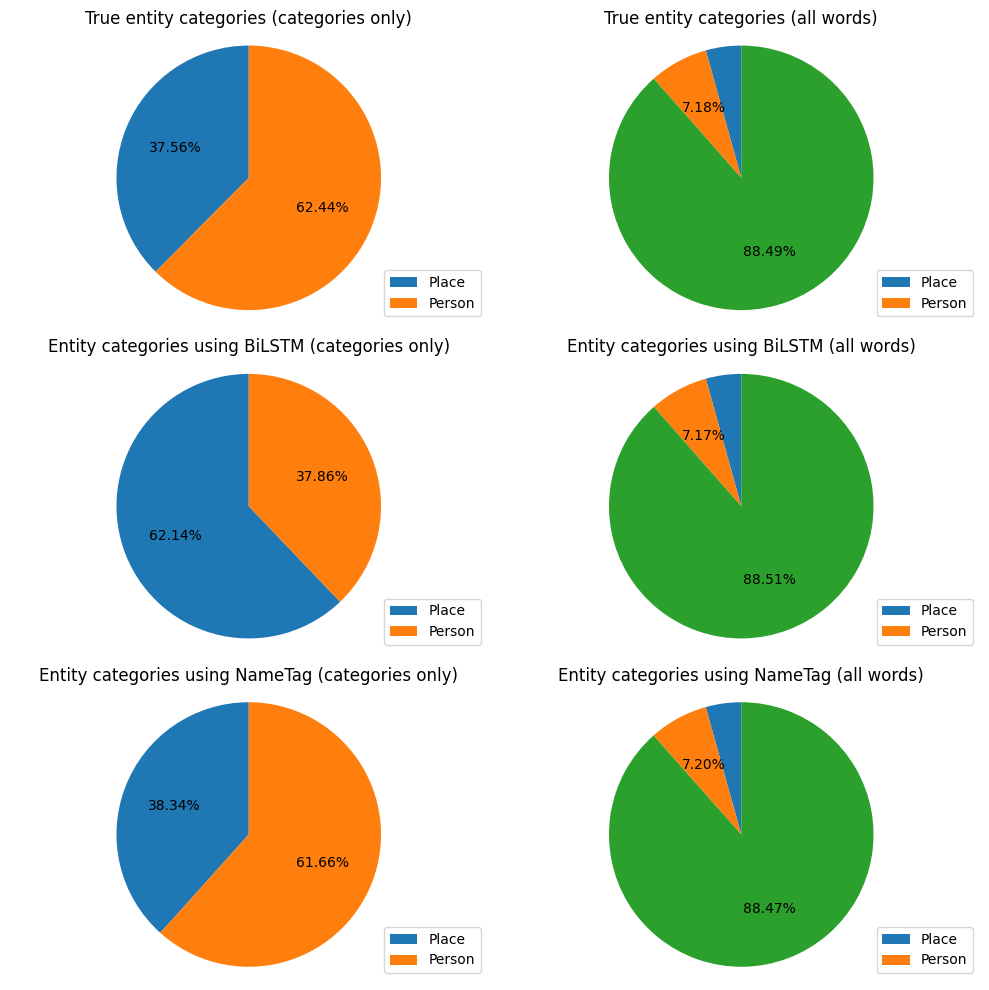

In [18]:
plot_categories(true_output_file_cleaned, BiLSTM_output_file_cleaned, NameTag_output_file_cleaned)

In [19]:
get_conf_matrix(true_output_file_cleaned, BiLSTM_output_file_cleaned, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "O"])
#Real values are in rows and predicted values are in columns.

B-PERSON  I-PERSON  B-PLACE  I-PLACE      O
B-PERSON       169         0      234        0    114
I-PERSON       153         1      154        0     46
B-PLACE         90         0      207        0    126
I-PLACE         15         0       32        0     54
O               93         0      224        4  10408

In [20]:
get_conf_matrix(true_output_file_cleaned, NameTag_output_file_cleaned, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "O"])
#Real values are in rows and predicted values are in columns

B-PERSON  I-PERSON  B-PLACE  I-PLACE      O
B-PERSON       479         4        3        1     30
I-PERSON        17       326        2        2      7
B-PLACE          9         1      388        5     20
I-PLACE          2         0        8       81     10
O               25        15       40       16  10633

### Result after removing some entities
After removal of some words (FP words) that our BiLSTM model predicted incorrecly. We still have a similarly bad accuracy, the only thing that improved was the number of FP (but thats obvious given thats the ones we deleted). So we can safely say that NameTag model outperforms our BiLSTM one on this dataset.

# Using CCV as a dataset for comparison
Now we will use test part of the CCV dataset which was used to train the BiLSTM model
The test set was created by a rule-based approach

In [21]:
from calculate_accuracy import calculate_accuracy, calculate_accuracy_only_B_entities, calculate_accuracy_only_true_entities, calculate_accuracy_no_category

true_output_file = "files_to_compare/ccv_test_correct_cleaned.txt"
BiLSTM_output_file = "BiLSTM_results/ccv_test_output_cleaned.txt"
NameTag_output_file = "NameTag_results/output_ccv_test_BIO_cleaned.txt"

Mystic Person entities not counted into the accuracy (if word in true_file is categorized as Mystic Person, than we just skip to the next word)

In [22]:
print_accuracies(true_output_file, BiLSTM_output_file, NameTag_output_file)

Accuracies do consider Mystic Person as separate entity from Person:  False



Accuracy with BiLSTM:  0.998312315668904
Accuracy with NameTag:  0.9951250823091948

Accuracy with B-entities only BiLSTM:  0.9983287493843489
Accuracy with B-entities only NameTag:  0.9951241380073719

Accuracy on predicting correct entity category BiLSTM (only words that are entities in both files) 0.981237322515213
Accuracy on predicting correct entity category NameTag (only words that are entities in in both files) 0.9264947888096544

Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) BiLSTM 0.9396632366697848
Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) NameTag 0.9003741814780168


Total word count:  182094

True total number of all entities:  2138
Number of Person entities in true file:  1830
Number of Place entities in true file:  308

Total number of all entities using BiLSTM:  2120
Number of Person entities for BiLSTM:  1861
Number of Place entities for BiLSTM:  259

Total number of all entities using NameTag:  3564
Number of Person entities for NameTag:  3402
Number of Place entities for NameTag:  162


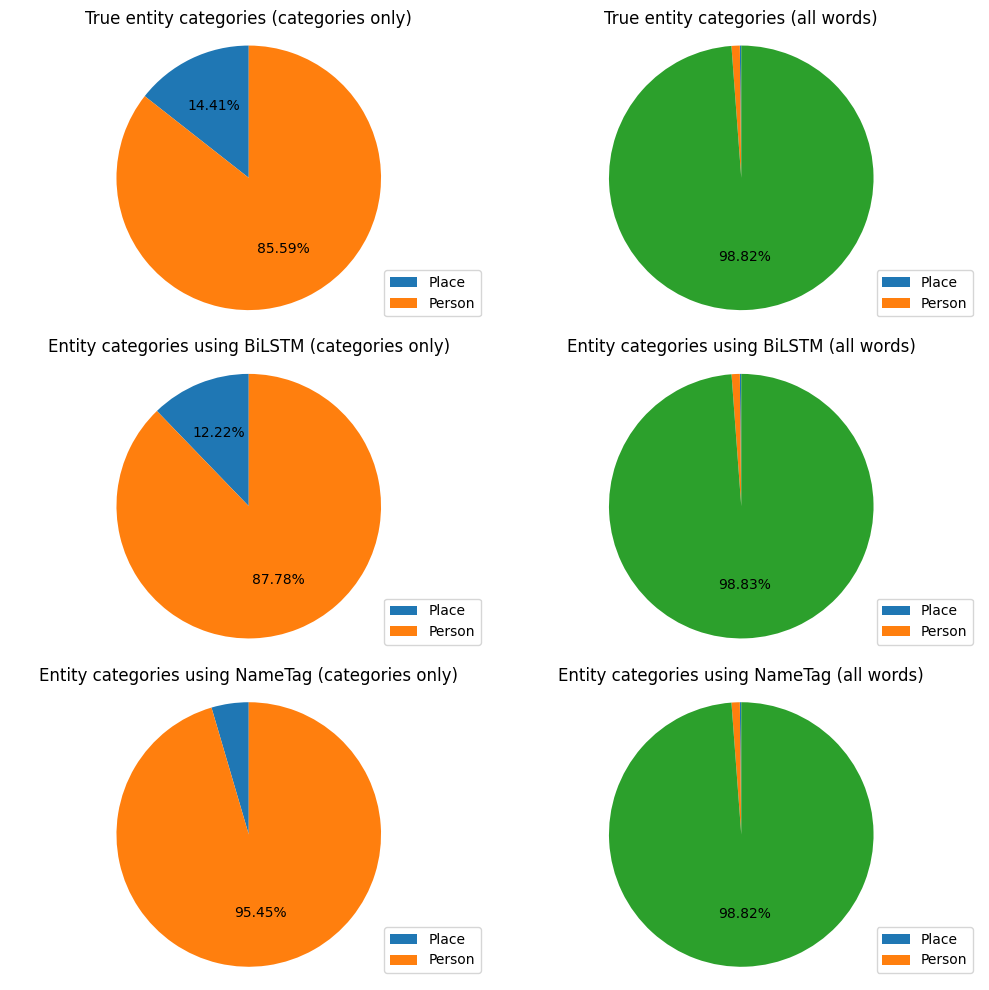

In [23]:
plot_categories(true_output_file, BiLSTM_output_file, NameTag_output_file)

### Confusion matrices

In [24]:
#True values in rows, predicted in columns
get_conf_matrix(true_output_file, BiLSTM_output_file, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "O"])

B-PERSON  I-PERSON  B-PLACE  I-PLACE       O
B-PERSON      1716         0       15        0      51
I-PERSON        17        15        1        0       1
B-PLACE         10         0      219        1      77
I-PLACE          0         0        0        0       0
O               87         5       17        0  178466

In [25]:
#True values in rows, predicted in columns
get_conf_matrix(true_output_file, NameTag_output_file, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "O"])

B-PERSON  I-PERSON  B-PLACE  I-PLACE       O
B-PERSON      1583        64       23        0     123
I-PERSON         1        35        0        0       1
B-PLACE        111         2      106        0      89
I-PLACE          0         0        0        0       0
O              348       102        9        7  178116

From confussion matrices we can see that our BiLSTM model seems to outperform the NameTag model

### Lets check what words we misslabelled in both models

**Staring with False Positives**

In [26]:
fp = false_positives(true_output_file, BiLSTM_output_file, ccv_file=True)

for line in fp:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Franklinem	O	B-PERSON
Ptáci	O	B-PERSON
Rolf	O	B-PERSON
Hanáci	O	B-PERSON
rusku	O	B-PLACE
Maria	O	B-PERSON
Rci	O	B-PERSON
Heloise	O	B-PERSON
Kain	O	B-PERSON
Vladimír	O	B-PERSON
štrébry	O	B-PERSON
David	O	B-PERSON
Jehova	O	B-PERSON
Řeky	O	B-PERSON
Josefovi	O	B-PERSON
Dolores	O	B-PERSON
Godunov	O	B-PERSON
Rci	O	B-PERSON
Gero	O	B-PLACE
Nile	O	B-PLACE
Dlouhým	O	B-PERSON
Sivá	O	B-PERSON
Jelačić	O	B-PERSON
syn	O	I-PERSON
Chudým	O	B-PERSON
Rci	O	B-PERSON
Rci	O	B-PERSON
Nového	O	B-PLACE
Brit	O	B-PERSON
Brit	O	B-PERSON
Marko	O	B-PERSON
Hlučín	O	B-PLACE
Kozel	O	B-PERSON
Brachu	O	B-PERSON
Malou	O	B-PERSON
Hraly	O	B-PERSON
Dílo	O	B-PERSON
Bordone	O	B-PERSON
otče	O	I-MYSTIC
Dis	O	B-PERSON
Pyšným	O	B-PERSON
Ptáci	O	B-PERSON
Nermuť	O	B-PERSON
Jírův	O	B-PERSON
Honzíčku	O	B-PERSON
Johanny	O	B-PERSON
Jasná	O	B-PLACE
Sypala	O	B-PERSON
pán	O	B-PERSON
Veliký	O	B-PLACE
pána	O	B-PERSON
boha	O	I-PERSON
Pilátově	O	B-PLACE
Maria	O	B-PERSON
Krátká	O	B-PLACE
Čekal	O	B-PERSON
Adámku	O	B-PERSON
Kopalů	O	B-PERSON
Nap

In [27]:
fp = false_positives(true_output_file, NameTag_output_file, ccv_file=True)

for line in fp:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

svatu	O	I-PERSON
Božíčku	O	B-PERSON
uchystal	O	I-PERSON
Rolf	O	B-PERSON
Hrdopyšku	O	B-PERSON
Slyše	O	B-PERSON
Nezkusil	O	B-PERSON
táh	O	I-PLACE
chválu	O	I-PERSON
Neví	O	B-PERSON
svaté	O	I-PERSON
Hanáci	O	B-PERSON
Něj	O	B-PERSON
svaté	O	B-PERSON
Maria	O	B-PERSON
Krkavče	O	B-PERSON
Královna	O	B-PERSON
Tvá	O	B-PERSON
svatého	O	B-PERSON
Kraj	O	B-PLACE
kouzla	O	I-PLACE
svatý	O	B-PERSON
svatý	O	B-PERSON
svatý	O	B-PERSON
svatý	O	B-PERSON
svatý	O	B-PERSON
svatý	O	B-PERSON
Pane	O	B-PERSON
svatý	O	I-PERSON
svatý	O	I-PERSON
Děcko	O	B-PERSON
Jemu	O	B-PERSON
Dost	O	B-PERSON
svatý	O	B-PERSON
Divoce	O	B-PERSON
Heloise	O	B-PERSON
Prosím	O	B-PERSON
Pane	O	B-PERSON
Jemu	O	B-PERSON
svatý	O	B-PERSON
Kain	O	B-PERSON
Tys	O	B-PERSON
Vladimír	O	B-PERSON
hříchem	O	I-PERSON
Ty	O	I-PERSON
Řídko	O	B-PERSON
Umlkl	O	B-PERSON
mlčel	O	I-PERSON
Kývá	O	B-PERSON
Přečetla	O	B-PERSON
Aj	O	B-PERSON
Ne	O	B-PERSON
křeslu	O	I-PERSON
Vašich	O	B-PERSON
David	O	B-PERSON
Ním	O	B-PERSON
Plápolala	O	B-PERSON
Pravíc	O	B-PERSON
Jehov

In [28]:
def place_person_incorrect(true_file_path, pred_file_path, ccv_file = False, include_mystic = False, omit_bio = True):
    true_lines = open(true_file_path, 'r', encoding='utf-8').readlines()
    predicted_lines = open(pred_file_path, 'r', encoding='utf-8').readlines()
    
    if len(true_lines) != len(predicted_lines):
        raise ValueError("Files have different lengths")
    
    incorrect_words = []
    
    for true_line, predicted_line in zip(true_lines, predicted_lines):
        # skip lines with empty space only (these lines just separate stanzas)
        if not true_line.strip() and not predicted_line.strip():
            continue
        
        true_label = true_line.strip().split()[-1]
        predicted_label = predicted_line.strip().split()[-1]
        
        if ccv_file:
            word = true_line.strip().split()[1]
        else:
            word = true_line.strip().split()[0]
            
        if (true_label[2:] == "MYSTIC" or predicted_label[2:] == "MYSTIC") and not include_mystic:
            continue
        
        if true_label != "O" and predicted_label != "O":
            if omit_bio:
                if true_label[2:] != predicted_label[2:]:
                    incorrect_words.append({"word": word, "true_label": true_label, "predicted_label": predicted_label})

            elif true_label != predicted_label:
                incorrect_words.append({"word": word, "true_label": true_label, "predicted_label": predicted_label})
    
    return incorrect_words

**Words that we labeled as Places but are Persons and vice versa**


In [29]:
place_person_miss = place_person_incorrect(true_output_file, BiLSTM_output_file, ccv_file=True)

for line in place_person_miss:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Kodaň	B-PLACE	B-PERSON
Rafaela	B-PLACE	B-PERSON
Nár	B-PERSON	B-PLACE
Nár	B-PERSON	B-PLACE
Kremlu	B-PLACE	B-PERSON
Martiny	B-PERSON	B-PLACE
Ottě	B-PERSON	B-PLACE
Cyrilova	B-PLACE	B-PERSON
Fingal	B-PLACE	B-PERSON
Albánci	B-PERSON	B-PLACE
Albánec	B-PERSON	B-PLACE
Bakchus	B-PLACE	B-PERSON
Gerta	B-PERSON	B-PLACE
Don	B-PERSON	B-PLACE
Klementin	B-PERSON	B-PLACE
Mello	B-PERSON	B-PLACE
Katy	B-PERSON	B-PLACE
Krumem	B-PERSON	B-PLACE
Hermína	B-PERSON	B-PLACE
Nepos	I-PERSON	B-PLACE
Betty	B-PERSON	B-PLACE
Slezanů	B-PLACE	B-PERSON
Don	B-PERSON	B-PLACE
Eufratu	B-PLACE	B-PERSON
Pierrot	B-PLACE	B-PERSON
Pierrot	B-PLACE	B-PERSON
Roháči	page	B-PERSON


In [30]:
place_person_miss = place_person_incorrect(true_output_file, NameTag_output_file, ccv_file=True)

for line in place_person_miss:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Konrádova	B-PLACE	B-PERSON
Milič	B-PLACE	B-PERSON
Turek	B-PERSON	B-PLACE
Vari	B-PLACE	B-PERSON
Shrewsbury	B-PLACE	B-PERSON
Nejvyššímu	B-PLACE	B-PERSON
Tigris	B-PLACE	B-PERSON
Žal	B-PLACE	B-PERSON
Arna	B-PLACE	B-PERSON
Cavtat	B-PLACE	B-PERSON
Jitku	B-PLACE	B-PERSON
Mihulky	B-PLACE	B-PERSON
Rafaela	B-PLACE	B-PERSON
Šárky	B-PERSON	B-PLACE
Kahlenberg	B-PLACE	B-PERSON
Márince	B-PLACE	B-PERSON
Polabí	B-PLACE	B-PERSON
Márinka	B-PLACE	B-PERSON
Hané	B-PLACE	B-PERSON
Elby	B-PLACE	B-PERSON
Jitka	B-PLACE	B-PERSON
Catiliny	B-PERSON	B-PLACE
Vlasti	B-PLACE	B-PERSON
Gullivera	B-PLACE	B-PERSON
Mág	B-PLACE	B-PERSON
Šárkou	B-PERSON	B-PLACE
Dalibor	B-PERSON	B-PLACE
Velíši	B-PLACE	B-PERSON
Kremlu	B-PLACE	B-PERSON
Jeny	B-PLACE	B-PERSON
Jitku	B-PLACE	B-PERSON
Jitce	B-PLACE	B-PERSON
Jalta	B-PLACE	B-PERSON
Bergov	B-PLACE	B-PERSON
Marja	B-PLACE	B-PERSON
Vladimíra	B-PERSON	B-PLACE
Občan	B-PLACE	B-PERSON
Meran	B-PLACE	B-PERSON
Tamar	B-PERSON	B-PLACE
Kanaán	B-PLACE	B-PERSON
Petrič	B-PLACE	B-PERSON
Petrič	B-PLACE	B

**And False Negatives**

In [31]:
fn = false_negatives(true_output_file, BiLSTM_output_file, ccv_file=True, calculate_mystic=False)

for line in fn:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Veličenstva	B-PERSON	O
Vlast	B-PLACE	O
Vari	B-PLACE	O
Faraona	B-PERSON	O
Zem	B-PLACE	O
Don	B-PERSON	O
Don	B-PERSON	O
Nejvyššímu	B-PLACE	O
Žal	B-PLACE	O
Veličenstvo	B-PERSON	O
Královno	B-PERSON	O
Země	B-PLACE	O
Vlast	B-PLACE	O
Pán	B-PERSON	O
Park	B-PLACE	O
Španěl	B-PERSON	O
Faraony	B-PERSON	O
Král	B-PERSON	O
Veličenstvo	B-PERSON	O
Goliáše	B-PERSON	O
Faraonů	B-PERSON	O
Vlasti	B-PLACE	O
Země	B-PLACE	O
Zemi	B-PLACE	O
Saharou	B-PLACE	O
Šárko	B-PERSON	O
Mág	B-PLACE	O
PETRKLÍČ	B-PLACE	O
Veličenstvem	B-PERSON	O
Svět	B-PLACE	O
Občan	B-PLACE	O
Vlast	B-PLACE	O
Vlast	B-PLACE	O
Všemohoucí	B-PERSON	O
Měsíc	B-PLACE	O
Zemi	B-PLACE	O
Žal	B-PLACE	O
Bystré	B-PLACE	O
Vlasti	B-PLACE	O
Občan	B-PLACE	O
Občan	B-PLACE	O
Bystré	B-PLACE	O
Královně	B-PERSON	O
Mořena	B-PLACE	O
Panno	B-PERSON	O
Země	B-PLACE	O
Král	B-PERSON	O
Nejvyšší	B-PLACE	O
Lazar	B-PERSON	O
Etnou	B-PLACE	O
Panno	B-PERSON	O
Království	B-PERSON	O
Žal	B-PLACE	O
Země	B-PLACE	O
Země	B-PLACE	O
Faraonu	B-PERSON	O
Vlasti	B-PLACE	O
Král	B-PERSON	O
Země	B

In [32]:
fn = false_negatives(true_output_file, NameTag_output_file, ccv_file=True, calculate_mystic=False)

for line in fn:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Veličenstva	B-PERSON	O
Vlast	B-PLACE	O
Dagmar	B-PERSON	O
Ctirad	B-PERSON	O
Hanou	B-PERSON	O
Přemysl	B-PERSON	O
Zem	B-PLACE	O
Don	B-PERSON	O
Juan	I-PERSON	O
Haně	B-PERSON	O
Kodaň	B-PLACE	O
Královno	B-PERSON	O
Světe	B-PLACE	O
Ithaky	B-PLACE	O
Vlast	B-PLACE	O
Vlast	B-PERSON	O
Jahve	B-PERSON	O
Tisa	B-PLACE	O
Ctirad	B-PERSON	O
Park	B-PLACE	O
Šimon	B-PERSON	O
Marje	B-PLACE	O
Král	B-PERSON	O
Lenko	B-PERSON	O
Veličenstvo	B-PERSON	O
Vlast	B-PERSON	O
Nár	B-PERSON	O
Nár	B-PERSON	O
Jara	B-PLACE	O
Němec	B-PERSON	O
RSFSR	B-PLACE	O
PETRKLÍČ	B-PLACE	O
Veličenstvem	B-PERSON	O
Svět	B-PLACE	O
Občan	B-PLACE	O
Vlast	B-PLACE	O
Vlast	B-PLACE	O
Tuileriím	B-PLACE	O
Bibi	B-PERSON	O
Nině	B-PERSON	O
Hostýn	B-PLACE	O
Marje	B-PLACE	O
Milíne	B-PLACE	O
Milíne	B-PLACE	O
Kremlu	B-PLACE	O
Měsíc	B-PLACE	O
Světem	B-PLACE	O
Žal	B-PLACE	O
Lumírem	B-PERSON	O
Barunko	B-PERSON	O
Vlasti	B-PLACE	O
Němci	B-PERSON	O
Občan	B-PLACE	O
Matěj	B-PERSON	O
Bohdan	B-PERSON	O
Mořena	B-PLACE	O
Prokop	B-PERSON	O
Záviši	B-PERSON	O
Král	B-PERSO

## Training Nametag 2 on CCV and comparing with BILSTM
Also some additional changes to the training dataset have been added (it should be more clear now)

In [33]:
from calculate_accuracy import calculate_accuracy, calculate_accuracy_only_B_entities, calculate_accuracy_only_true_entities, calculate_accuracy_no_category

true_output_file = "../../model_implementation/inputs/Stanzas_newer_version_test.conll"
BiLSTM_output_file = "../../model_implementation/outputs/Stanzas_newer_version_test.txt"
NameTag_output_file = "../../nametag-2.0.0/outputs/ccv_stanzas_newer_version_test.txt"

In [34]:
print_accuracies(true_output_file, BiLSTM_output_file, NameTag_output_file, calculate_mystic=True)

Accuracies do consider Mystic Person as separate entity from Person:  True

Accuracy with BiLSTM:  0.9974316964088031
Accuracy with NameTag:  0.9977638046318027

Accuracy with B-entities only BiLSTM:  0.9974645142717952
Accuracy with B-entities only NameTag:  0.9977634827666383

Accuracy on predicting correct entity category BiLSTM (only words that are entities in both files) 0.9740140629776827
Accuracy on predicting correct entity category NameTag (only words that are entities in in both files) 0.9917908178777743

Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) BiLSTM 0.9487252936121455
Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) NameTag 0.9521627040962475


Total word count:  186286

True total number of all entities:  2154
Number of Person entities in true file:  1839
Number of Place entities in true file:  315

Total number of all entities using BiLSTM:  2064
Number of Person entities for BiLSTM:  1805
Number of Place entities for BiLSTM:  259

Total number of all entities using NameTag:  2113
Number of Person entities for NameTag:  1837
Number of Place entities for NameTag:  276


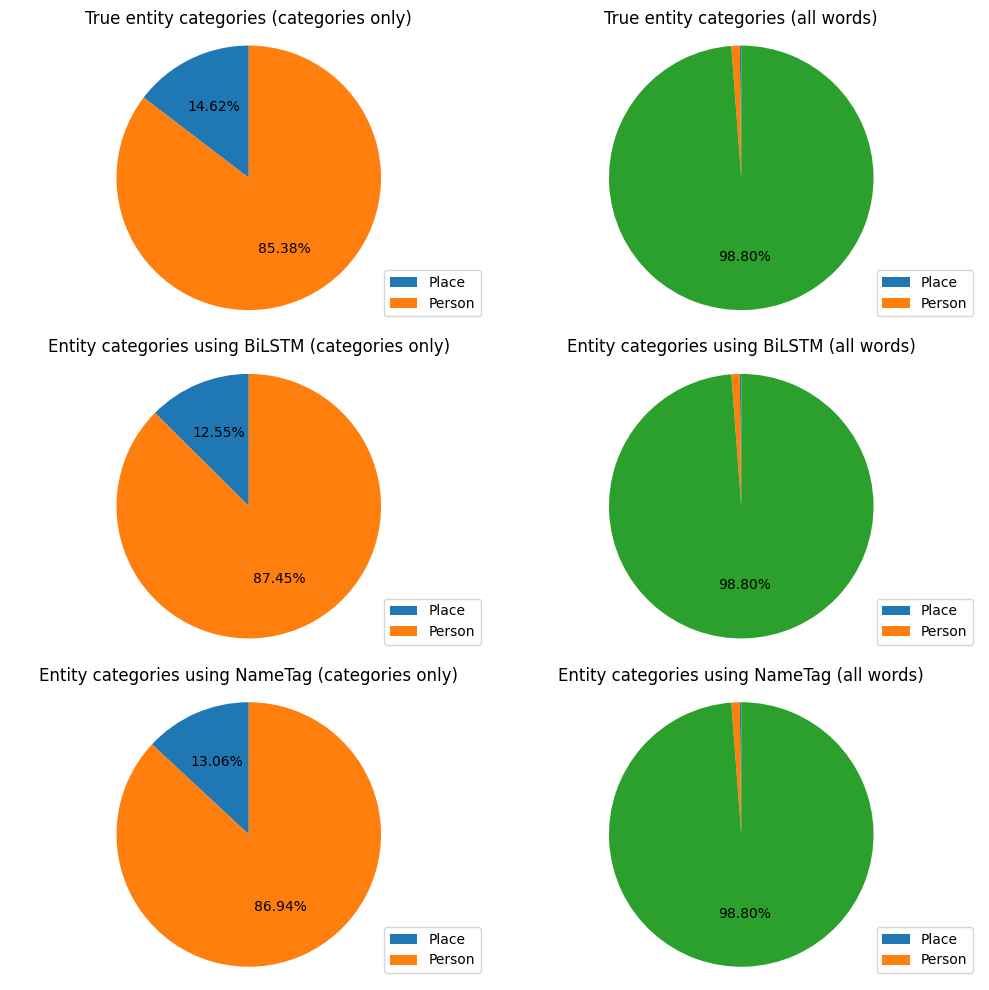

In [35]:
plot_categories(true_output_file, BiLSTM_output_file, NameTag_output_file)

### Confusion matrices

In [36]:
#True values in rows, predicted in columns
get_conf_matrix(true_output_file, BiLSTM_output_file, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "B-MYSTIC", "I-MYSTIC", "O"])

B-PERSON  I-PERSON  B-PLACE  I-PLACE  B-MYSTIC  I-MYSTIC       O
B-PERSON      1710         5       23        0        15         0      47
I-PERSON         7        17        0        0         0         0       3
B-PLACE         22         0      213        0         4         0      76
I-PLACE          0         0        0        0         0         0       0
B-MYSTIC        10         1        5        0      1263         0      52
I-MYSTIC         0         0        0        0         0         5       1
O               30         3       18        0       127         1  176992

In [37]:
#True values in rows, predicted in columns
get_conf_matrix(true_output_file, NameTag_output_file, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "B-MYSTIC", "I-MYSTIC", "O"])

B-PERSON  I-PERSON  B-PLACE  I-PLACE  B-MYSTIC  I-MYSTIC       O
B-PERSON      1763         1        6        0         2         0      34
I-PERSON         7        25        0        0         0         0       1
B-PLACE         11         0      230        0         0         0      74
I-PLACE          0         0        0        0         0         0       0
B-MYSTIC         2         0        6        0      1269         0      54
I-MYSTIC         0         0        1        0         0         1       4
O               25         3       33        0       138         2  176972

### Exact examples

**False Positives**

In [38]:
#FP for BiLSTM

fp = false_positives(true_output_file, BiLSTM_output_file)

for line in fp:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Kain	O	B-PERSON
vari	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Benito	O	B-PERSON
oficiál	O	B-PERSON
bůh	O	B-MYSTIC
Řek	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Věra	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Kníže	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
matka	O	B-REAL
boží	O	I-REAL
bůh	O	B-MYSTIC
vesna	O	B-MYSTIC
Jiří	O	B-PERSON
bůh	O	B-MYSTIC
vesna	O	B-MYSTIC
Jitka	O	B-PLACE
Golgota	O	B-PLACE
bůh	O	B-MYSTIC
Marko	O	B-PERSON
Julie	O	B-PERSON
Horký	O	B-PERSON
Eva	O	B-PERSON
bůh	O	B-MYSTIC
Jan	O	B-PERSON
bůh	O	B-MYSTIC
moc	O	B-PLACE
bůh	O	B-MYSTIC
Pomona	O	B-PLACE
bůh	O	B-MYSTIC
Jednota	O	B-PLACE
bůh	O	B-MYSTIC
Perun	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Abrahám	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
vysoký	O	B-PLACE
Johanna	O	B-PLACE
Herodes	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Maria	O	B-PERSON
bůh	O	B-

In [39]:
#FP for NameTag

fp = false_positives(true_output_file, NameTag_output_file)

for line in fp:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Kain	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
Benito	O	B-PERSON
otec	O	I-MYSTIC
bůh	O	B-MYSTIC
Řek	O	B-PERSON
bůh	O	B-MYSTIC
Ruska	O	B-PLACE
Dolores	O	B-PERSON
bůh	O	B-MYSTIC
Manon	O	B-PLACE
bůh	O	B-MYSTIC
Kníže	O	B-PERSON
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
bůh	O	B-MYSTIC
matka	O	B-PERSON
boží	O	I-PERSON
bůh	O	B-MYSTIC
vesna	O	B-MYSTIC
vesna	O	B-MYSTIC
vesna	O	B-MYSTIC
Jiří	O	B-PERSON
kyklop	O	B-MYSTIC
vesna	O	B-MYSTIC
bůh	O	B-MYSTIC
Jitka	O	B-PLACE
Golgota	O	B-PLACE
bůh	O	B-MYSTIC
Marko	O	B-PERSON
MCCCCXV	O	I-PERSON
Julie	O	B-PERSON
Eva	O	B-PERSON
bůh	O	B-MYSTIC
Jan	O	B-PERSON
bůh	O	B-MYSTIC
Pomona	O	B-PLACE
bůh	O	B-MYSTIC
vesna	O	B-MYSTIC
bůh	O	B-MYSTIC
Jednota	O	B-MYSTIC
Perun	O	B-MYSTIC
bůh	O	B-MYSTIC
Abrahám	O	B-PERSON
bůh	O	B-MYSTIC
Athéna	O	B-MYSTIC
Johanna	O	B-PERSON
Herodes	O	B-PERSON
bůh	O

**False Negatives**

In [40]:
# need to set ccv file to False since our output files start with token and not word position like in the original ccv_test data
fn = false_negatives(true_output_file, BiLSTM_output_file, ccv_file=False, calculate_mystic=True)

for line in fn:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

svatý	I-MYSTIC	O
bůh	B-MYSTIC	O
park	B-PLACE	O
národ	B-PLACE	O
nána	B-PLACE	O
země	B-PLACE	O
země	B-PLACE	O
Cavtat	B-PLACE	O
Pavlína	B-PERSON	O
lucemburský	I-PERSON	O
vlast	B-PLACE	O
Žižka	I-PERSON	O
Petrič	B-PLACE	O
Jehova	B-PERSON	O
Romanus	B-PERSON	O
Žirov	B-PLACE	O
sfinga	B-MYSTIC	O
Prokopov	B-PLACE	O
země	B-PLACE	O
Polabí	B-PLACE	O
jařina	B-PLACE	O
nymfa	B-MYSTIC	O
bůh	B-MYSTIC	O
Maria	B-PERSON	O
země	B-PLACE	O
země	B-PLACE	O
turek	B-PERSON	O
nymfa	B-MYSTIC	O
Ella	B-PERSON	O
sfinga	B-MYSTIC	O
král	B-PERSON	O
země	B-PLACE	O
Nár	B-PERSON	O
Nár	B-PERSON	O
Róm	B-PERSON	O
perchta	B-MYSTIC	O
bůh	B-MYSTIC	O
země	B-PLACE	O
božství	B-MYSTIC	O
Šalomoun	B-PERSON	O
Šalomoun	B-PERSON	O
národ	B-PLACE	O
bůh	B-MYSTIC	O
bůh	B-MYSTIC	O
bystrý	B-PLACE	O
bůh	B-MYSTIC	O
Nikola	B-PERSON	O
vlast	B-PLACE	O
Kain	B-PERSON	O
Ganga	B-PLACE	O
lítice	B-MYSTIC	O
mořena	B-PLACE	O
žal	B-PLACE	O
Jalta	B-PLACE	O
Martina	B-PERSON	O
vlast	B-PLACE	O
Smutek	B-PLACE	O
bůh	B-MYSTIC	O
Babinský	B-PERSON	O
bystrý	B-PLACE	O


In [41]:
# need to set ccv file to False since our output files start with token and not word position like in the original ccv_test data
fn = false_negatives(true_output_file, BiLSTM_output_file, ccv_file=False, calculate_mystic=True)

for line in fn:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

svatý	I-MYSTIC	O
bůh	B-MYSTIC	O
park	B-PLACE	O
národ	B-PLACE	O
nána	B-PLACE	O
země	B-PLACE	O
země	B-PLACE	O
Cavtat	B-PLACE	O
Pavlína	B-PERSON	O
lucemburský	I-PERSON	O
vlast	B-PLACE	O
Žižka	I-PERSON	O
Petrič	B-PLACE	O
Jehova	B-PERSON	O
Romanus	B-PERSON	O
Žirov	B-PLACE	O
sfinga	B-MYSTIC	O
Prokopov	B-PLACE	O
země	B-PLACE	O
Polabí	B-PLACE	O
jařina	B-PLACE	O
nymfa	B-MYSTIC	O
bůh	B-MYSTIC	O
Maria	B-PERSON	O
země	B-PLACE	O
země	B-PLACE	O
turek	B-PERSON	O
nymfa	B-MYSTIC	O
Ella	B-PERSON	O
sfinga	B-MYSTIC	O
král	B-PERSON	O
země	B-PLACE	O
Nár	B-PERSON	O
Nár	B-PERSON	O
Róm	B-PERSON	O
perchta	B-MYSTIC	O
bůh	B-MYSTIC	O
země	B-PLACE	O
božství	B-MYSTIC	O
Šalomoun	B-PERSON	O
Šalomoun	B-PERSON	O
národ	B-PLACE	O
bůh	B-MYSTIC	O
bůh	B-MYSTIC	O
bystrý	B-PLACE	O
bůh	B-MYSTIC	O
Nikola	B-PERSON	O
vlast	B-PLACE	O
Kain	B-PERSON	O
Ganga	B-PLACE	O
lítice	B-MYSTIC	O
mořena	B-PLACE	O
žal	B-PLACE	O
Jalta	B-PLACE	O
Martina	B-PERSON	O
vlast	B-PLACE	O
Smutek	B-PLACE	O
bůh	B-MYSTIC	O
Babinský	B-PERSON	O
bystrý	B-PLACE	O


**Which Places we labeled as Persons and vice versa**

In [42]:
place_person_miss = place_person_incorrect(true_output_file, BiLSTM_output_file, ccv_file=False)

for line in place_person_miss:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Byzance	B-PLACE	B-PERSON
Valdemar	B-PERSON	B-PLACE
Milič	B-PLACE	B-PERSON
Prajz	B-PERSON	B-PLACE
Doré	B-PLACE	B-PERSON
Hont	B-PLACE	B-PERSON
Petrič	B-PLACE	B-PERSON
Jitka	B-PLACE	B-PERSON
Omsk	B-PLACE	B-PERSON
Seneka	B-PERSON	B-PLACE
Ječmínek	B-PERSON	B-PLACE
Rafaela	B-PLACE	B-PERSON
Milín	B-PLACE	B-PERSON
Marija	B-PERSON	B-PLACE
Kršna	B-PERSON	B-PLACE
Nikola	B-PERSON	B-PLACE
pán	B-PERSON	B-REAL
Ježíš	I-PERSON	I-REAL
Konstancie	B-PERSON	B-PLACE
Byzanc	B-PLACE	B-PERSON
Valentina	B-PERSON	B-PLACE
Fingal	B-PLACE	B-PERSON
Sapfó	B-PERSON	B-PLACE
Zdenka	B-PERSON	B-PLACE
Zdenka	B-PERSON	B-PLACE
Marija	B-PERSON	B-PLACE
matka	B-PERSON	B-REAL
boží	I-PERSON	I-REAL
pán	B-PERSON	B-REAL
Ježíš	I-PERSON	I-REAL
Františka	B-PERSON	B-PLACE
Ječmen	B-PLACE	B-PERSON
Ječmen	B-PLACE	B-PERSON
Slezan	B-PLACE	B-PERSON
Sarah	B-PERSON	B-PLACE
Bol	B-PLACE	B-PERSON
Tanger	B-PLACE	B-PERSON
Daliborka	B-PLACE	B-PERSON
Dobruš	B-PLACE	B-PERSON
Vinař	B-PLACE	B-PERSON
Otka	B-PLACE	B-PERSON
Kršna	B-PERSON	B-PLACE
Garin	B-PL

In [43]:
place_person_miss = place_person_incorrect(true_output_file, NameTag_output_file, ccv_file=False)

for line in place_person_miss:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

Prajz	B-PERSON	B-PLACE
Hont	B-PLACE	B-PERSON
Rafaela	B-PLACE	B-PERSON
Kršna	B-PERSON	B-PLACE
dorota	B-PERSON	B-PLACE
Fingal	B-PLACE	B-PERSON
Eufrat	B-PLACE	B-PERSON
Ječmen	B-PLACE	B-PERSON
Ječmen	B-PLACE	B-PERSON
Bol	B-PLACE	B-PERSON
Este	B-PERSON	B-PLACE
Tanger	B-PLACE	B-PERSON
Daliborka	B-PLACE	B-PERSON
Dobruš	B-PLACE	B-PERSON
Kršna	B-PERSON	B-PLACE
Kršna	B-PERSON	B-PLACE
Augšpurk	B-PLACE	B-PERSON


### Conclusion
We can say that NameTag 2 model outperform BiLSTM if they are both trained on the same dataset.

Unfortunately, there are still some mislabelled entities, not only due to model's inaccuracies but also in the training data.<br>
Therefore, it might be useful to change the NameTag model's architecture a bit, to accommodate the fact that the training data are not 100% accurate.<br>
I.E.: they are weakly labeled training data

## NameTag 2.0 Hyperparameter tuning on CS dataset
We compare different versions of the NameTag2.0 model, trained on CCV.
The comparison will be done on CS dataset which have been manually labeled (so it is 100% correct)

In [44]:
from calculate_accuracy import calculate_accuracy, calculate_accuracy_only_B_entities, calculate_accuracy_only_true_entities, calculate_accuracy_no_category
import numpy as np

true_output_file = "./hand_tagged_test_files/cs_true_lemma.txt"
default_output = "../../nametag-2.0.0/outputs/cs_default.txt"
label_smoothing_output = "../../nametag-2.0.0/outputs/cs_smoothing_2.txt"

In [45]:
all_true_ents = []
with open (true_output_file, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line_arr = line.strip().split('\t')
            if line_arr[-1].startswith("B") or line_arr[-1].startswith("I"):
                all_true_ents.append(line_arr[0])

print(f"Number of unique entities in true file: {len(np.unique(all_true_ents))}")

Number of unique entities in true file: 219


Total word count:  12731

True total number of all entities:  336
Number of Person entities in true file:  204
Number of Place entities in true file:  132

Total number of all entities using BiLSTM:  200
Number of Person entities for BiLSTM:  79
Number of Place entities for BiLSTM:  121

Total number of all entities using NameTag:  170
Number of Person entities for NameTag:  127
Number of Place entities for NameTag:  43


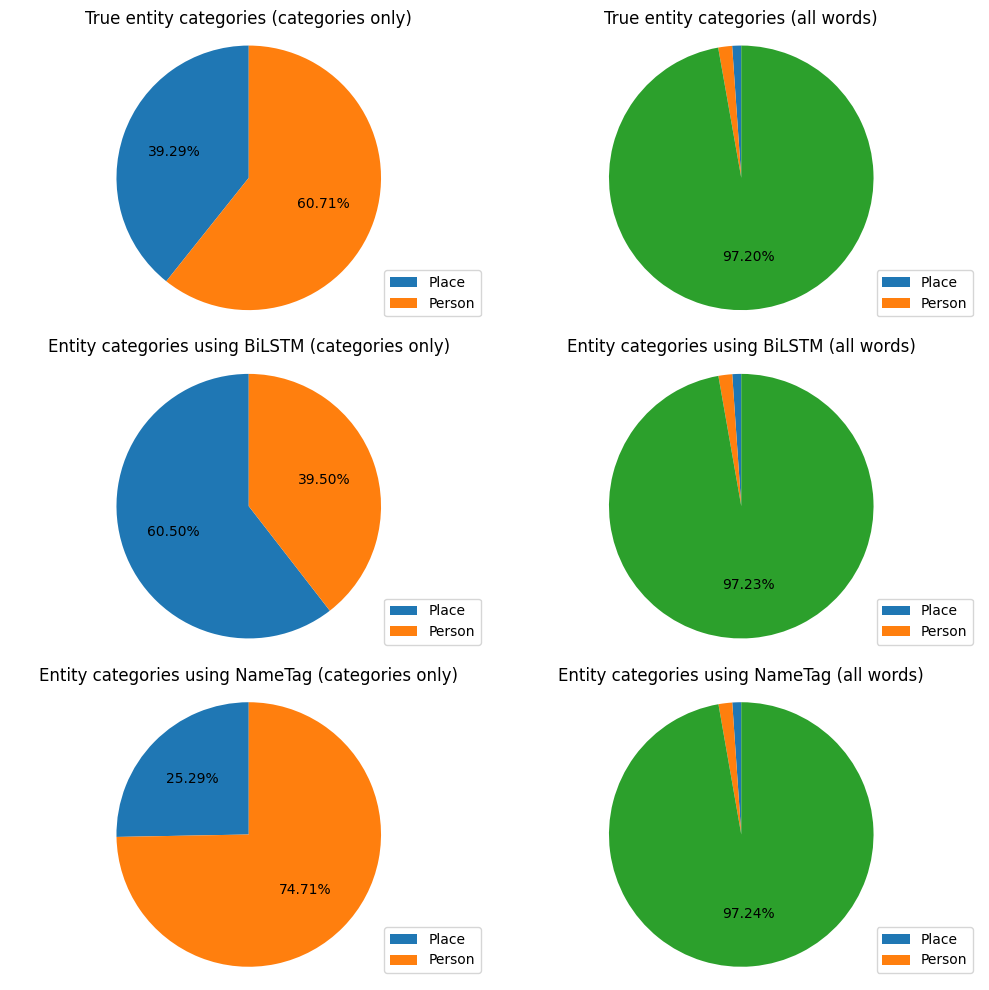

In [46]:
plot_categories(true_output_file, default_output, label_smoothing_output)

In [47]:
print_accuracies(true_output_file, default_output, label_smoothing_output)

Accuracies do consider Mystic Person as separate entity from Person:  False

Accuracy with BiLSTM:  0.9798668885191347
Accuracy with NameTag:  0.9787853577371048

Accuracy with B-entities only BiLSTM:  0.9798668885191347
Accuracy with B-entities only NameTag:  0.9787853577371048

Accuracy on predicting correct entity category BiLSTM (only words that are entities in both files) 0.6473684210526316
Accuracy on predicting correct entity category NameTag (only words that are entities in in both files) 0.6111111111111112

Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) BiLSTM 0.5744047619047619
Accuracy regardless of entity type/category. Calculating only if word is correctly labeled as an entity or not (regardless of type/category) NameTag 0.49702380952380953


In [48]:
get_conf_matrix(true_output_file, default_output, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "B-MYSTIC", "O"])
#Real values are in rows and predicted values are in columns

B-PERSON  I-PERSON  B-PLACE  I-PLACE  B-MYSTIC      O
B-PERSON        59         3       36        0        15     84
I-PERSON         0         0        0        0         0      7
B-PLACE         14         0       64        0         2     44
I-PLACE          0         0        0        0         0      8
B-MYSTIC         0         0        0        0         0      0
O                2         1       21        0         5  11655

In [49]:
get_conf_matrix(true_output_file, label_smoothing_output, labels=["B-PERSON", "I-PERSON", "B-PLACE", "I-PLACE", "B-MYSTIC", "O"])
#Real values are in rows and predicted values are in columns

B-PERSON  I-PERSON  B-PLACE  I-PLACE  B-MYSTIC      O
B-PERSON        75         3       11        0        13     95
I-PERSON         0         0        0        0         0      7
B-PLACE         39         2       24        0         0     59
I-PLACE          0         0        0        0         0      8
B-MYSTIC         0         0        0        0         0      0
O                8         0        8        0         2  11666

Recall
What proportion of actual positives was identified correctly

TP/TP+FN

Precision
What proportion of positive identifications was actually correct

TP/TP+FP

In [50]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

true_labels = labels_to_array(true_output_file)
pred_labels = labels_to_array(default_output)
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, pred_labels, average=None, labels=np.unique(pred_labels))

print(f'F1 scores:', flush=True)
print(f'Labels: {np.unique(pred_labels)}', flush=True)
print(f'Precision: {precision}', flush=True)
print(f'Recall: {recall}', flush=True)
print(f'F1 Score: {f1_score}', flush=True)

precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, pred_labels, average='micro', labels=np.unique(pred_labels))

print(f'\nMicro F1 score:', flush=True)
print(f'Precision: {precision}', flush=True)
print(f'Recall: {recall}', flush=True)
print(f'F1 Score: {f1_score}', flush=True)


F1 scores:
Labels: ['' 'B-MYSTIC' 'B-PERSON' 'B-PLACE' 'I-PERSON' 'O']
Precision: [1.         0.         0.78666667 0.52892562 0.         0.9878793 ]
Recall: [1.         0.         0.29949239 0.51612903 0.         0.99751797]
F1 Score: [1.         0.         0.43382353 0.52244898 0.         0.99267524]

Micro F1 score:
Precision: 0.9809912811248135
Recall: 0.981608111294506
F1 Score: 0.9812995992771274


c:\Users\Ondřej Černý\Documents\vylet\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

true_labels = labels_to_array(true_output_file)
pred_labels = labels_to_array(label_smoothing_output)
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, pred_labels, average=None, labels=np.unique(pred_labels))

print(f'F1 scores:', flush=True)
print(f'Labels: {np.unique(pred_labels)}', flush=True)
print(f'Precision: {precision}', flush=True)
print(f'Recall: {recall}', flush=True)
print(f'F1 Score: {f1_score}', flush=True)

precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, pred_labels, average='micro', labels=np.unique(pred_labels))

print(f'\nMicro F1 score:', flush=True)
print(f'Precision: {precision}', flush=True)
print(f'Recall: {recall}', flush=True)
print(f'F1 Score: {f1_score}', flush=True)

F1 scores:
Labels: ['' 'B-MYSTIC' 'B-PERSON' 'B-PLACE' 'I-PERSON' 'O']
Precision: [1.         0.         0.6147541  0.55813953 0.         0.98572032]
Recall: [1.         0.         0.38071066 0.19354839 0.         0.99845943]
F1 Score: [1.         0.         0.47021944 0.28742515 0.         0.99204898]


c:\Users\Ondřej Černý\Documents\vylet\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro F1 score:
Precision: 0.9799701515984605
Recall: 0.9805863396997564
F1 Score: 0.9802781488174748


Recall might be high becase of the large number of FN in the training CCV dataset. I can have some words that should be correctly labeled as entities in the training dataset, labeled as not an entity at all.

### Printing out some errors

**False Negatives**

(predicted file predicts 'O' and true file says "B-..")

In [52]:
fn = false_negatives(true_output_file, default_output, ccv_file=False, calculate_mystic=False)

for line in fn:
    print(f'{line["word"]}\t{line["true_label"]}\t{line["predicted_label"]}')

hora	I-PLACE	O
bůh	B-PERSON	O
mamon	B-PERSON	O
bůh	B-PERSON	O
pan	B-PERSON	O
Dorda	B-PERSON	O
chalkol	B-PERSON	O
Čech	B-PLACE	O
Čech	B-PLACE	O
Franc	B-PERSON	O
háj	B-PERSON	O
Hync	B-PERSON	O
moravský	B-PLACE	O
Čech	B-PLACE	O
Čech	B-PLACE	O
kostolanský	B-PLACE	O
Hájův	B-PERSON	O
plavec	B-PLACE	O
Oldra	B-PERSON	O
Grafeneck	B-PERSON	O
Sázava	B-PLACE	O
Čechy	B-PLACE	O
Pavel	B-PERSON	O
Němce	B-PLACE	O
český	B-PLACE	O
moravský	B-PLACE	O
bůh	B-PERSON	O
bůh	B-PERSON	O
Šimáček	B-PERSON	O
Nejlův	B-PERSON	O
Velib	B-PERSON	O
rudý	B-PLACE	O
moře	I-PLACE	O
Belkis	B-PERSON	O
bůh	B-PERSON	O
chrám	I-PLACE	O
veliký	B-PERSON	O
český	B-PLACE	O
docent	B-PERSON	O
Hymenův	B-PLACE	O
chrám	I-PLACE	O
hebronský	B-PLACE	O
duch	B-PERSON	O
svatý	I-PERSON	O
svatý	B-PERSON	O
panna	I-PERSON	O
pán	B-PERSON	O
svatý	B-PERSON	O
otec	I-PERSON	O
boží	B-PERSON	O
lvův	B-PERSON	O
Vltava	B-PLACE	O
váha	B-PLACE	O
hrad	I-PLACE	O
pán	B-PERSON	O
boží	B-PERSON	O
pán	B-PERSON	O
Nasťa	B-PERSON	O
Vasco	B-PERSON	O
Ilja	B-PERSON	O
jugosl

## Accuracy of training data itself
Accuracy of Wiki categorization on hand-labeled data.

### Confusion matrix

In [57]:
# True values are in rows, predicted in columns
data = pd.read_csv("hand_tagged_test_files/cs_lemma_wiki_corrected.txt", delimiter='\t', header=None, names=['Token', 'TrueLabel', 'PredictedLabel'])
conf_matrix = confusion_matrix(data['TrueLabel'], data['PredictedLabel'], labels=["PERSON", "PLACE", "O"])
pd.DataFrame(conf_matrix, index=["PERSON", "PLACE", "O"], columns=["PERSON", "PLACE", "O"])


PERSON  PLACE      O
PERSON      66      2    136
PLACE        7     14    111
O           39    259  11386